In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* In titanic dataset of seaborn library, 'survived' column gives information about the individual survived or not.
* The distribution of survived people's age is plotted as below:

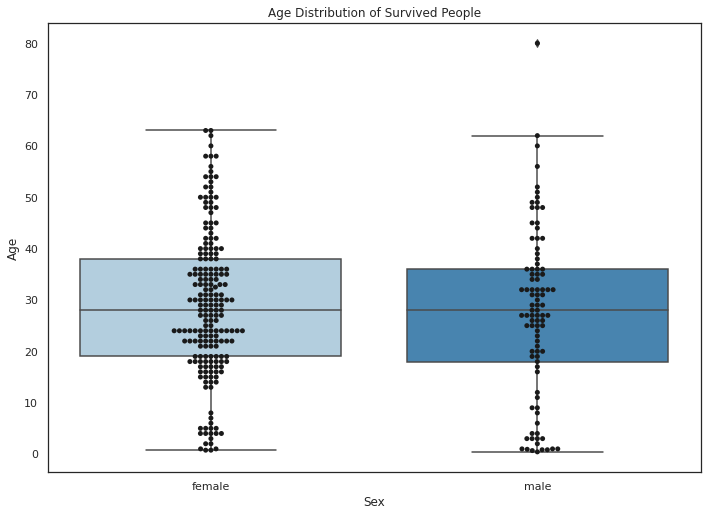

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style='white')

ax = sns.boxplot(data=titanic[titanic['survived']==1], 
                 x= 'sex', 
                 y= 'age',
                 palette="Blues")

ax = sns.swarmplot(data=titanic[titanic['survived']==1], 
                 x= 'sex', 
                 y= 'age',
                 color="0.10").set(title="Age Distribution of Survived People", 
                                       xlabel="Sex",
                                       ylabel="Age")

* As per the plot, the average age of survived female is nearly equal to 28 and average age of male is nearly equal to 27.

In [ ]:
avg_age = pd.pivot_table(titanic[(titanic['survived']== 1) ],
               index =['sex'], 
               values=['age'], 
               aggfunc= 'mean')

np.round(avg_age, 2)

,age
sex,
female,28.85
male,27.28


* The percentage distribution of the gender of the people who survived from the titanic.

In [ ]:
gender_dist=pd.pivot_table(titanic,
                                 index =['sex'], 
                                 values=['survived'], 
                                 aggfunc= 'sum')

gender_dist['% survived'] = gender_dist['survived']*100/gender_dist['survived'].sum()

np.round(gender_dist.drop('survived', axis=1),2)

,% survived
sex,
female,68.13
male,31.87


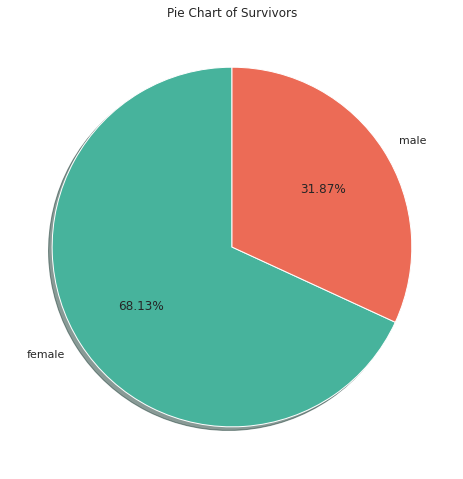

In [ ]:
plt.pie(gender_dist['% survived'],
        labels=gender_dist.index,
        autopct='%1.2f%%',
        shadow=True,
        startangle=90,
        colors=["#47B39C", "#EC6B56"])
plt.title("Pie Chart of Survivors")
plt.show()